In [201]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt

In [202]:
def r(x):
    """A convenience function to compute values of r."""
    return 0.5*x*np.cos(4*np.pi*x)

def make_y(x):
    """A convenience function to sample from N(r(x), 0.1)."""
    return r(x) + 0.1*np.random.normal(size=(len(x), 1))

def gaussian(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

def boxcar(x):
    return 0.5*(np.abs(x) <= 1)

def epanechnikov(x):
    return 0.75*(1 - x**2)*(np.abs(x) <= 1)

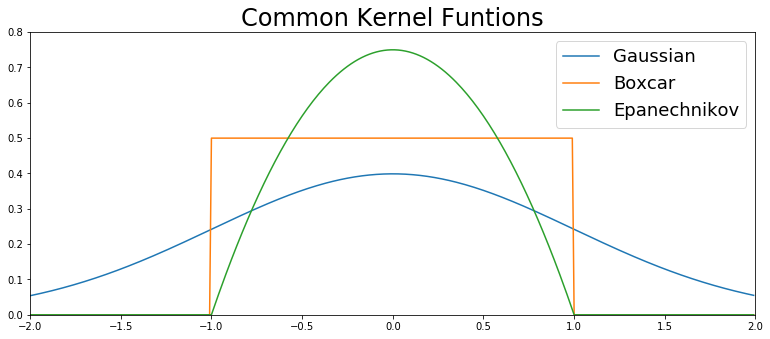

In [203]:
x = np.arange(-2, 2, 0.01)
plt.figure(figsize=(13, 13*0.8/2))
plt.title("Common Kernel Funtions", fontsize=24)
plt.xlim(-2, 2)
plt.ylim(0, 0.8)
plt.plot(x, gaussian(x), label="Gaussian")
plt.plot(x, boxcar(x), label="Boxcar")
plt.plot(x, epanechnikov(x), label="Epanechnikov")
plt.legend(fontsize=18)
plt.savefig("kernels.pdf")
plt.show()

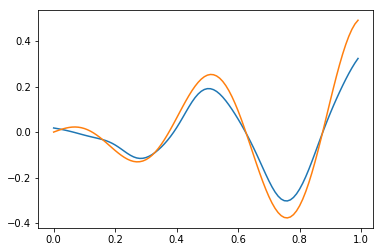

In [127]:
def make_smoother(X_, y_, ker=gaussian, h=0.1):
    def smoother(X):
        K = ker((X - X_)/h)
        return np.sum(y_ * K, axis=0)/np.sum(K, axis=0)
    return smoother

size=200
X_ = np.random.uniform(size=size).reshape(size, 1)
y_ = make_y(X_)
s = make_smoother(X_, y_, ker=gaussian, h=0.05)
X = np.arange(0, 1, 0.01)
y = s(X)
plt.plot(X, y)
plt.plot(X, r(X))

In [199]:
size=200
X_ = np.random.uniform(size=size).reshape(size, 1)
y_ = make_y(X_)
ss = [make_smoother(X_[i].reshape(1, 1), y_[i]) for i in range(size)]
X = np.arange(0, 1, 0.01)
s = ss[0]
y = s(X)

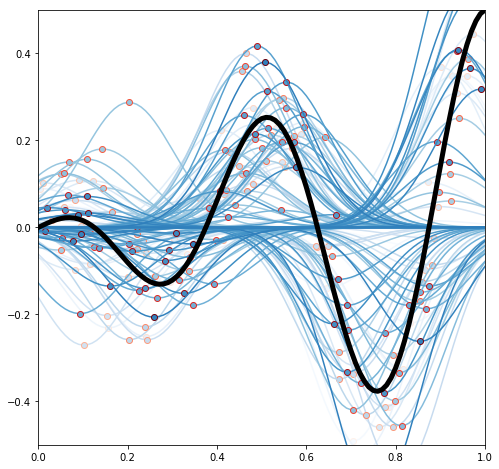

In [200]:
from matplotlib import cm
m = cm.get_cmap("Blues")
mm = cm.get_cmap("Reds")
plt.figure(figsize=(8, 8))
plt.xlim(0, 1)
plt.ylim(-0.5, 0.5)
for i in range(size):
    plt.plot(x, np.sqrt(2*np.pi)*y_[i]*gaussian((x - X_[i])/0.1), color=m(0.7*i/size))
    plt.plot(X_[i], y_[i], 'o', color=m(0.7*i/size), markeredgecolor=mm(i/size))
plt.plot(x, r(x), 'k', linewidth=5)
plt.savefig("waves.pdf")